In [ ]:
import gevent
import pandas as pd
import numpy as np
import math
import pymysql
import time 
import functools as ft
import glob, os   
import operator as op
import shelve
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from pandas.api.types import is_numeric_dtype
from pathlib import Path
from itertools import combinations, product, permutations
from sqlalchemy.engine import create_engine
from datetime import datetime
from ast import literal_eval
from scipy import stats  
from scipy.stats.mstats import gmean
from pythonds.basic.stack import Stack
from pythonds.trees.binaryTree import BinaryTree
from collections import defaultdict
import collections
from typing import List, Set, Tuple 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

data_directory = '/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/' 

In [ ]:
df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/single_system_summary.csv')
print(df.columns)
#ax = plt.gca()

df.hist(column='precision', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='recall', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_all_combined.csv')

df.hist(column='precision', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='recall', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')

df.hist(column='precision', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='recall', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/mipacq_all_combined.csv')

df.hist(column='precision')

df.hist(column='recall')
plt.show()

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/mipacq_Procedures_combined.csv')

df.hist(column='precision', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='recall', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

def plot_eval_stats(stats):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    axs[0].hist(stats["precision"], color="skyblue")
    axs[0].axvline(np.mean(stats["precision"]), linewidth=3, color="deepskyblue")  # noqa
    axs[0].set_title("Precision")

    axs[1].hist(stats["recall"], color="skyblue")
    axs[1].axvline(np.mean(stats["recall"]), linewidth=3, color="deepskyblue")
    axs[1].set_title("Recall")

    axs[2].hist(stats["f1"], color="skyblue")
    axs[2].axvline(np.mean(stats["f1"]), linewidth=3, color="deepskyblue")
    axs[2].set_title("f1")

    plt.show()

In [ ]:
df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')

ax = df.hist(column=['precision', 'recall'], bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    
    # Remove title
    x.set_title("")

    # Set x-axis label
    
    labels = ['precision', 'recall']
    for i in [0, 1]:
        ax[i].set_xlabel(labels[i], labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
bins = np.linspace(0, 1.0)

plt.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
plt.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.legend(loc='upper right')
plt.suptitle('Fairview: Procedure', fontsize=20)
plt.show()

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Anatomy_combined.csv')

plt.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
plt.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.legend(loc='upper right')
plt.suptitle('Fairview: Anatomy', fontsize=20)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Anatomy_combined.csv')
bins = np.linspace(0, 1.0)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1)

ax.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
ax.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')
ax.legend(loc='upper right')

ax.set_ylabel('Frequency')
ax.set_title('Fairview: Anatomy', fontsize=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Drug_combined.csv')
ax = fig.add_subplot(2, 2, 2)

ax.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
ax.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')

ax.legend(loc='upper right')

ax.set_ylabel('Frequency')
ax.set_title('Fairview: Drug', fontsize=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Finding_combined.csv')
ax = fig.add_subplot(2, 2, 3)

ax.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
ax.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')

ax.legend(loc='upper right')

ax.set_ylabel('Frequency')
ax.set_title('Fairview: Finding', fontsize=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
ax = fig.add_subplot(2, 2, 4)

ax.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
ax.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')

ax.legend(loc='upper right')

ax.set_ylabel('Frequency')
ax.set_title('Fairview: Procedure', fontsize=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.tight_layout()

fig.savefig('test.tif')

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

input_dir = '/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/'

files = ['fairview_Anatomy_combined.csv', 
         'fairview_Drug_combined.csv', 
         'fairview_Finding_combined.csv',
         'fairview_Procedure_combined.csv']

title = ['Fairview: Anatomy',
         'Fairview: Drug',
         'Fairview: Finding',
         'Fairview: Procedure']

bins = np.linspace(0, 1.0)
fig = plt.figure(figsize=(15,10))
for i in range(1, len(files) + 1):
    df = pd.read_csv(input_dir + files[i - 1])

    ax = fig.add_subplot(2, 2, i)

    ax.hist(df['precision'], bins, alpha=0.5, label='precision', color='silver')
    ax.hist(df['recall'], bins, alpha=0.5, label='recall', color='slategrey')
    ax.legend(loc='upper right')

    ax.set_ylabel('Frequency')
    ax.set_title(title[i-1], fontsize=20)
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

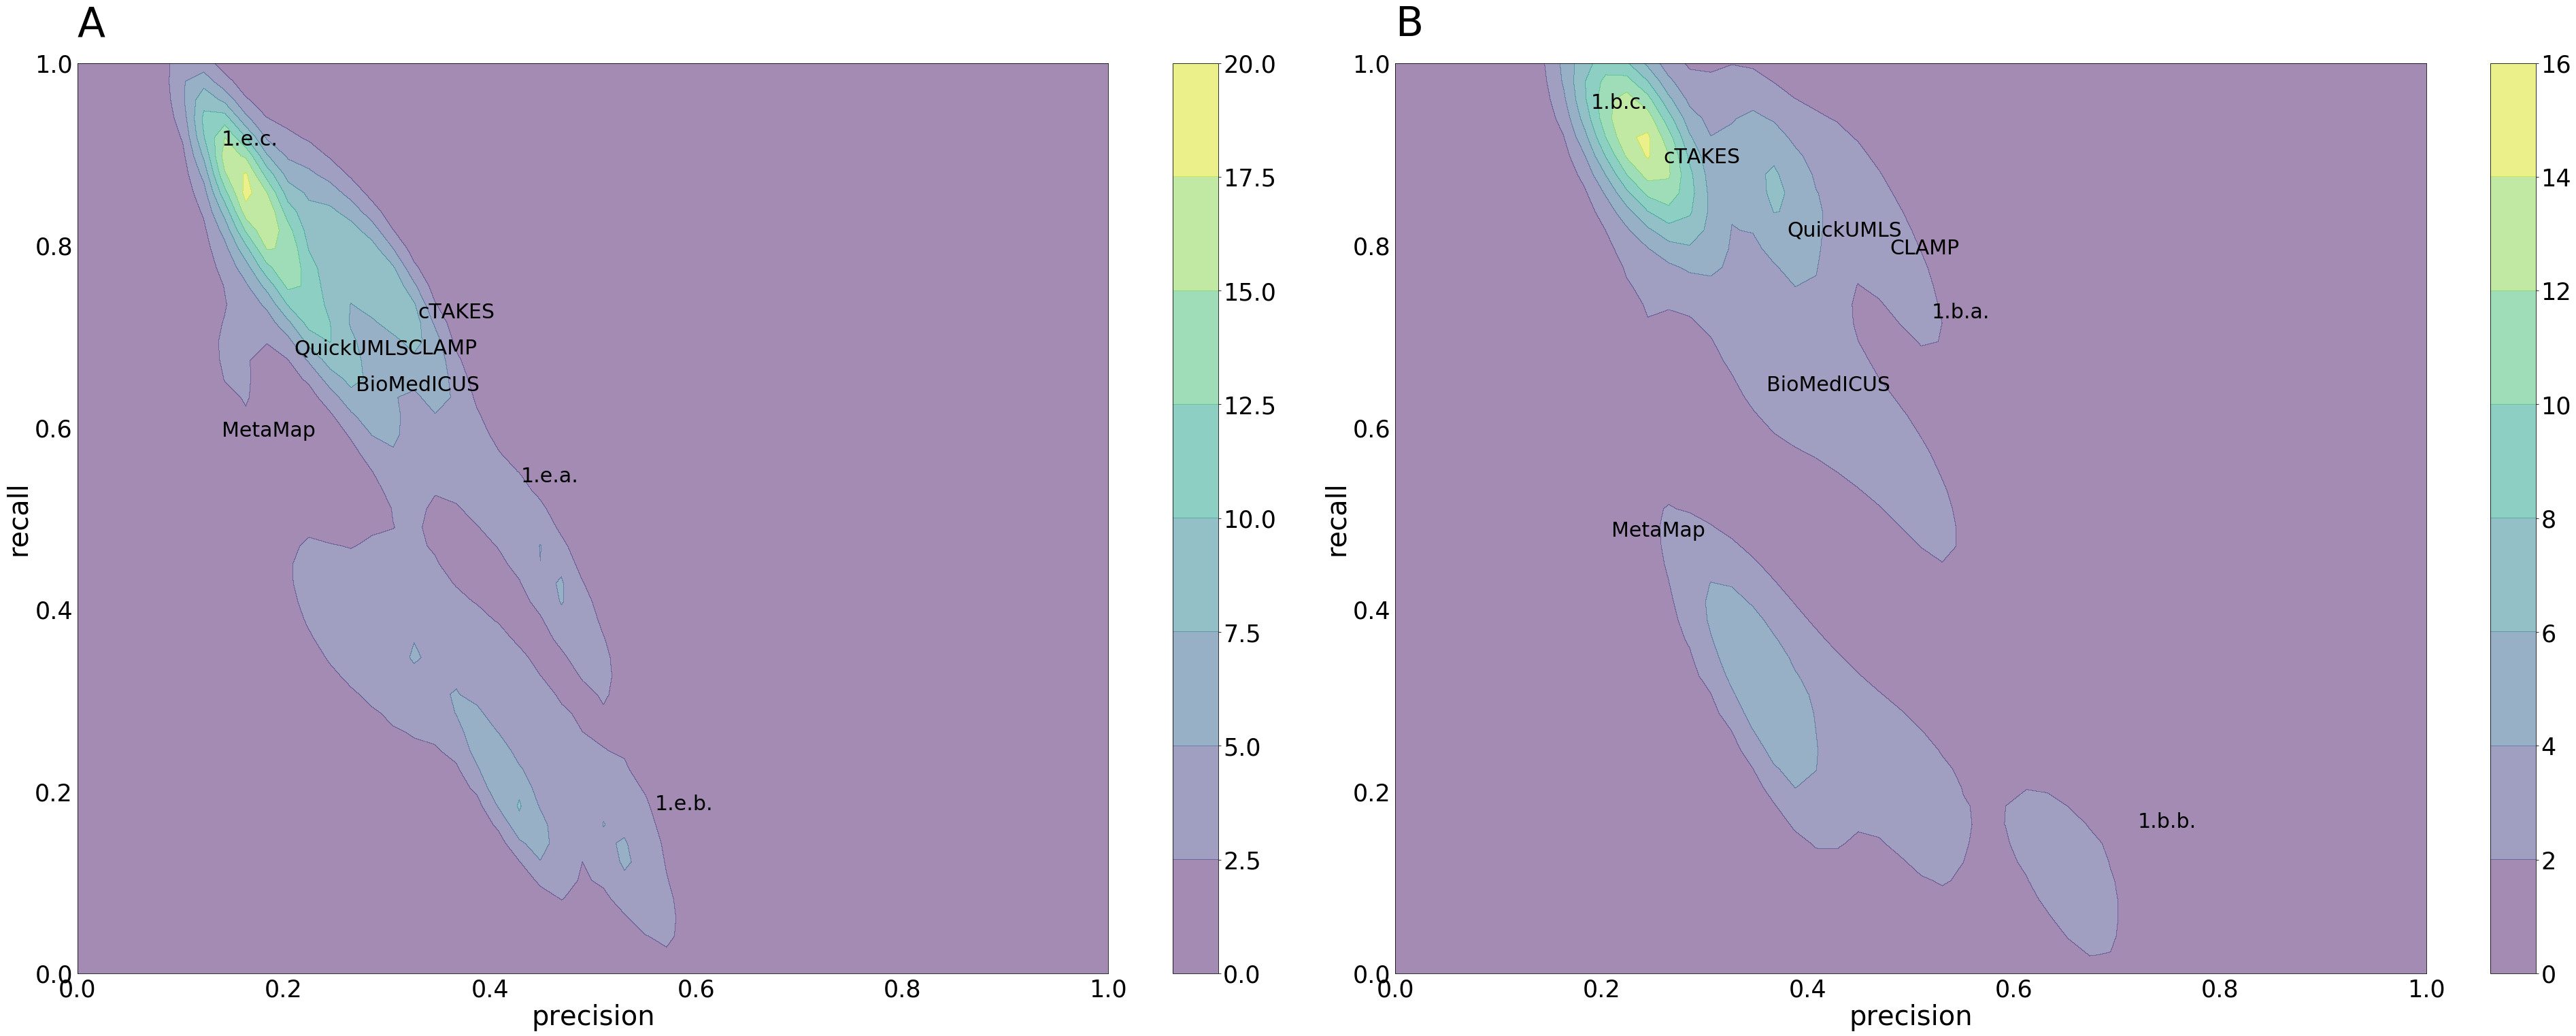

In [33]:
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from matplotlib import rcParams
import pandas as pd
import numpy as np
# def to_text():
#     df1 = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
#     df1['st'] = 'procedures'
#     df2 = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Anatomy_combined.csv')
#     df2['st'] = 'anatomy'
#     df3 = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Drug_combined.csv')
#     df3['st'] = 'drug'
#     df4 = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Finding_combined.csv')
#     df4['st'] = 'finding'

#     df = pd.concat([df1, df2, df3, df4])

#     df = df[['precision', 'recall']]

#     # x = df.head().to_string(header=True,
#     #                   index=False,
#     #                   index_names=False).split('\n')
#     # vals = [','.join(ele.split()) for ele in x]

#     # print(vals)

#     df.to_csv(r'test.txt', header=True, index=None, sep=' ', mode='a')

input_dir = '/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/'

files = ['fairview_all_combined.csv','fairview_Chemicals&Drugs_combined.csv']
#title = ['Fairview: complete','Fairview: Chemicals & Drugs']
title = ['A','B']

#files = ['fairview_Anatomy_combined.csv', 'fairview_Finding_combined.csv', 'fairview_Procedure_combined.csv']
#title = ['Fairview: Anatomy', 'Fairview: Disorders', 'Fairview: Procedures']

#df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
rcParams['axes.titlepad'] = 40

# for stacked
#fig = plt.figure(figsize=(45,35))
fig = plt.figure(figsize=(55,40))
style = dict(size=30, color='black')

for i in range(1, len(files) + 1):
    
    df = pd.read_csv(input_dir + files[i - 1])
    x = np.array(df['precision'].tolist())
    y = np.array(df['recall'].tolist())

    # https://stackoverflow.com/questions/36957149/density-map-heatmaps-in-matplotlib

    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[0:1:x.size**0.5*1j,0:1:y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

#     if i == 1:
#         ax = fig.add_subplot(2, 2, i)
#     if i == 2:
#         ax = fig.add_subplot(2, 2, i+1)
    ax = fig.add_subplot(2, 2, i)

    # alpha=0.5 will make the plots semitransparent
    CS = ax.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)
    ax.set_xlabel('precision', color='black', size=40)
    ax.set_ylabel('recall',  color='black', size=40)
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on", labelsize=35)
    ax.set_title(title[i-1], fontsize=60, loc="left")

    cbar = plt.colorbar(CS)
    cbar.ax.tick_params(labelsize=35)
    #cbar.ax.tick_params(labelsize=20)

    #ax.set_xlim(x.min(), x.max())
    #ax.set_ylim(y.min(), y.max())
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    #fig.subplots_adjust(wspace=0.2)
    if i == 1:
        ax.text(.43, .54, r'1.e.a.', **style)
        ax.text(.56, .18, r'1.e.b.', **style)
        ax.text(.14, .91, r'1.e.c.', **style)
        
        ax.text(.27, .64, r'BioMedICUS', **style)
        ax.text(.32, .68, r'CLAMP', **style)
        ax.text(.33, .72, r'cTAKES', **style)
        ax.text(.14, .59, r'MetaMap', **style)
        ax.text(.21, .68, r'QuickUMLS', **style)
        
        '''
        complete:
        f -> 0.43	0.54
        p -> 0.56	0.18
        r -> 0.14	0.91
        b9; 0.27	0.64
        clamp: 0.32	0.68
        ctakes: 0.27	0.64
        mm: 0.14	0.59
        qu: 0.21	0.68
        '''

    if i == 2:
        ax.text(.52, .72, r'1.b.a.', **style)
        ax.text(.72, .16, r'1.b.b.', **style)
        ax.text(.19, .95, r'1.b.c.', **style)
        
        ax.text(.36, .64, r'BioMedICUS', **style)
        ax.text(.48, .79, r'CLAMP', **style)
        ax.text(.26, .89, r'cTAKES', **style)
        ax.text(.21, .48, r'MetaMap', **style)
        ax.text(.38, .81, r'QuickUMLS', **style)
        #ax.text(.44, .8, r'TM', **style)
        
    
        '''
        Drug:
        best F-score: 0.52	0.72
        best precison: 0.72	0.16
        best recall: 0.19	0.95
        
        b9; 0.36	0.64
        clamp: 0.48	0.79
        ctakes: 0.26	0.89
        mm: 0.21	0.48
        qu: 0.38	0.81
        
      ''' 
#import Image
#import matplotlib.pyplot as plt
fig.tight_layout()
#fig.subplots_adjust(wspace=0.2)
fig.savefig('testplot.png')
#Image.open('testplot.png').save('testplot.jpg','JPEG')



In [38]:
df = pd.read_csv(input_dir + files[1])
print(len(df.drop_duplicates(subset=['F', 'precision', 'recall'])))

df = df[(df['precision'] > 0.40) & (df['recall'] > 0.8)]
print(len( df.drop_duplicates(subset=['F', 'precision', 'recall'])))
df['merge'].tolist()

777
52


['((biomedicus&ctakes)|clamp)',
 '((biomedicus&metamap)|clamp)',
 '((biomedicus&quick_umls)|clamp)',
 '((biomedicus|clamp)&ctakes)',
 '((clamp|biomedicus)&ctakes)',
 '((clamp|quick_umls)&ctakes)',
 '((ctakes&biomedicus)|clamp)',
 '((ctakes&quick_umls)|clamp)',
 '((metamap&biomedicus)|clamp)',
 '((metamap&quick_umls)|clamp)',
 '((quick_umls&biomedicus)|clamp)',
 '((quick_umls&ctakes)|clamp)',
 '((quick_umls&metamap)|clamp)',
 '((quick_umls|clamp)&ctakes)',
 '(((biomedicus&ctakes)&metamap)|clamp)',
 '(((biomedicus&ctakes)&quick_umls)|clamp)',
 '(((biomedicus&metamap)&ctakes)|clamp)',
 '(((biomedicus&metamap)&quick_umls)|clamp)',
 '(((biomedicus&quick_umls)&ctakes)|clamp)',
 '(((biomedicus&quick_umls)&metamap)|clamp)',
 '(((biomedicus|clamp)|quick_umls)&ctakes)',
 '(((biomedicus|ctakes)&quick_umls)|clamp)',
 '(((biomedicus|metamap)&quick_umls)|clamp)',
 '(((biomedicus|quick_umls)&ctakes)|clamp)',
 '(((biomedicus|quick_umls)&metamap)|clamp)',
 '(((biomedicus|quick_umls)|clamp)&ctakes)',
 '

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn
#seaborn.set(style='ticks')

df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df['precision'])
b_heights, b_bins = np.histogram(df['recall'], bins=a_bins)

width = (a_bins[1] - a_bins[0])

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
#seaborn.despine(ax=ax, offset=10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/gms/development/nlp/nlpie/data/ensembling-u01/output/submission/overlap/combined/fairview_Procedure_combined.csv')
f, axes = plt.subplots(2, figsize=(7, 7), sharex=True)
sns.distplot( df["precision"] , color="skyblue", ax=axes[0])
sns.distplot( df["recall"] , color="olive", ax=axes[1])



In [ ]:
# RESULTS

def get_results():
    results = pd.DataFrame()
    for fname in glob.glob(data_directory + '/submission/combined/*.csv'):

        #print(fname)
        t = os.path.basename(fname)
        corpus = t.split('_')[0]
        #print(corpus)
        semtypes = t.split('_')[-2:-1][0]
        print(t.split('_')[-2:-1], t, corpus, semtypes)

        temp = pd.read_csv(fname) 

        temp['corpus'] = corpus
        temp['semtypes'] = semtypes
        temp['file'] = t

        frames = [ temp, results ]
        results = pd.concat(frames)


    merges = results.copy()
    merges = merges.rename(index=str, columns={"n_gold": "n_ref"})

    # sfingle system evaluation
    cols_to_keep = ['merge', 'corpus', 'semtypes', 'F', 'precision', 'recall', 'n_sys', 'n_gold']    
    #print(results[cols_to_keep][results['merge'].isin(['biomedicus', 'clamp', 'ctakes', 'metamap', 'quick_umls'])].sort_values(by=['corpus', 'merge', 'semtypes']).rename(index=str, columns={"merge": "system", "n_gold": "n_ref"}))
    df = results[cols_to_keep][results['merge'].isin(['biomedicus', 'clamp', 'ctakes', 'metamap', 'quick_umls'])].sort_values(by=['corpus', 'merge', 'semtypes']).rename(index=str, columns={"merge": "system", "n_gold": "n_ref"}).copy()
    #df.to_csv(data_directory + '/submission/single_system_summary.csv')

    merges.reset_index(inplace=True)
    merges = merges[~merges['merge'].isin(['biomedicus', 'clamp', 'ctakes', 'metamap', 'quick_umls'])]
    max_f = merges.copy()
    max_p = merges.copy()
    max_r = merges.copy()
    #print(len(max_f), len(max_p), len(max_r))
    
    # https://datascience.stackexchange.com/questions/26308/after-grouping-to-minimum-value-in-pandas-how-to-display-the-matching-row-resul
    cols_to_keep = ['merge', 'corpus', 'semtypes', 'F', 'precision', 'recall', 'n_sys', 'n_ref']    
    f = max_f.loc[max_f.groupby(['corpus','semtypes'])['F'].idxmax()]
    f = f[cols_to_keep].sort_values(by=['corpus','semtypes'])

    cols_to_keep = ['merge', 'corpus', 'semtypes', 'F', 'precision', 'recall', 'n_sys', 'n_ref']    
    p = max_p.loc[max_p.groupby(['corpus','semtypes'])['precision'].idxmax()]
    p = p[cols_to_keep].sort_values(by=['corpus','semtypes'])

    cols_to_keep = ['merge', 'corpus', 'semtypes', 'F', 'precision', 'recall', 'n_sys', 'n_ref']    
    r = max_r.loc[max_r.groupby(['corpus','semtypes'])['recall'].idxmax()]
    r = r[cols_to_keep].sort_values(by=['corpus','semtypes'])
    #print(len(f), len(p), len(r))
    #print(f, p, r)

    writer = pd.ExcelWriter(data_directory + '/submission/max_merge_summary.xlsx', engine='xlsxwriter')
    f.to_excel(writer, sheet_name='max F-score')
    p.to_excel(writer, sheet_name='max precision')
    r.to_excel(writer, sheet_name='max recall')
    writer.save()
    
get_results()

In [ ]:
import pandas as pd
from scipy import stats
from scipy.stats.mstats import gmean

def geometric_mean(metrics):
    """
    1. Get rank average of F1, TP/FN, TM
        http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/
        https://stackoverflow.com/questions/46686315/in-pandas-how-to-create-a-new-column-with-a-rank-according-to-the-mean-values-o?rq=1
    2. Take geomean of 2.
        https://stackoverflow.com/questions/42436577/geometric-mean-applied-on-row
    """
    
    data = pd.DataFrame() 

    metrics['F1 rank']=metrics['F'].rank(ascending=0,method='average')
    metrics['TP/FN rank']=metrics['TP/FN'].rank(ascending=0,method='average')
    metrics['TM rank']=metrics['TM'].rank(ascending=0,method='average')
    metrics['Gmean'] = gmean(metrics.iloc[:,-3:],axis=1)

    return metrics  

In [ ]:
def get_vote():
    results = pd.DataFrame()
    for fname in glob.glob(data_directory + '/submission/vote/*.csv'):

        #print(fname)
        t = os.path.basename(fname)
        corpus = t.split('_')[0]
        print(corpus)
        semtypes = t.split('_')[-2:-1][0]
        print(t.split('_')[-2:-1], t, corpus, semtypes)

        temp = pd.read_csv(fname) 

        temp['corpus'] = corpus
        temp['semtypes'] = semtypes
        temp['file'] = t

        frames = [ temp, results ]
        results = pd.concat(frames)
        
    merges = results.copy()
    merges = merges.rename(index=str, columns={"n_gold": "n_ref"})
    
    # sfingle system evaluation
    cols_to_keep = ['merge', 'corpus', 'semtypes', 'F', 'precision', 'recall', 'n_sys', 'n_gold']    
    #print(results[cols_to_keep][results['merge'].isin(['biomedicus', 'clamp', 'ctakes', 'metamap', 'quick_umls'])].sort_values(by=['corpus', 'merge', 'semtypes']).rename(index=str, columns={"merge": "system", "n_gold": "n_ref"}))
    #df = results[cols_to_keep][results['merge'].isin(['biomedicus', 'clamp', 'ctakes', 'metamap', 'quick_umls'])].sort_values(by=['corpus', 'merge', 'semtypes']).rename(index=str, columns={"merge": "system", "n_gold": "n_ref"}).copy()
    results.to_csv(data_directory + '/submission/vote_summary.csv')

#get_vote()
def update_complete_data():
    metrics = pd.DataFrame()
    for fname in glob.glob(data_directory + '/submission/combined/*.csv'):

        #print(fname)
        t = os.path.basename(fname)
        u = t.split('.')[0]
        print(u)
        now = datetime.now()
        timestamp = datetime.timestamp(now)
        
        df = pd.read_csv(fname)
        df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'F1 rank', 'TP/FN rank', 'TM rank', 'Gmean'], axis=1, inplace=True)
        #print(df.head(1))
        #print(geometric_mean(df)) 
        
        new_file_name = u + '_' + str(timestamp) + '.csv'
        geometric_mean(df).to_csv(data_directory + '/submission/combined/' + new_file_name)
        
update_complete_data()

In [ ]:
'''
df = pd.read_csv(data_directory + '/submission/single_system_summary.csv')
#print(df)

out = pd.pivot_table(df, values = ['precision', 'recall', 'F'], index=['corpus','semtypes'], columns = 'system').reset_index()

out.to_csv(data_directory + '/submission/single_system_out.csv')
'''
#df = pd.read_csv(data_directory + '/submission/test.csv')
# #print(df)

#pd.pivot_table(df, values = ['clinical_m1', 'clinical_m2'], index=['test_number','clinical_type'], columns = 'system').reset_index()

In [ ]:
'''
from functools import reduce
f = pd.read_excel(open(data_directory + '/submission/max_merge_summary.xlsx', 'rb'), sheet_name='max F-score')
#print(f)

p = pd.read_excel(open(data_directory + '/submission/max_merge_summary.xlsx', 'rb'), sheet_name='max precision')
#print(p)

r = pd.read_excel(open(data_directory + '/submission/max_merge_summary.xlsx', 'rb'), sheet_name='max recall')
#print(r)

data_frames = [f, p, r]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['corpus', 'semtypes'], how='inner'), data_frames)
df_merged = df_merged.rename(index=str, columns={"merge_x": "merge_f", "merge_y": "merge_p", "merge": 'merge_r', 'n_ref_x': 'n_ref'})

#print(df_merged)
cols_to_keep = ['merge_f', 'merge_p', 'merge_r', 'F', 'precision', 'recall', 'n_ref', 'corpus', 'semtypes']
print(df_merged[cols_to_keep])

df_merged[cols_to_keep].to_csv(data_directory + '/submission/max_merge_out.csv')
'''

In [ ]:
'''
nested:
fairview_all_merge_metrics_entity_overlap_Anatomy_1578694661.483111.csv
fairview_all_merge_metrics_entity_overlap_Drug_1578691637.613012.csv
fairview_all_merge_metrics_entity_overlap_Finding_1578694540.707012.csv
fairview_all_merge_metrics_entity_overlap_Procedure_1578695994.216092.csv
fairview_all_merge_metrics_entity_overlap_complete_1578628666.2874.csv
i2b2_all_merge_metrics_entity_overlap_complete_1578635243.689393.csv
i2b2_all_merge_metrics_entity_overlap_problem_1578689510.705959.csv
i2b2_all_merge_metrics_entity_overlap_test,treatment_1578686098.336592.csv
mipacq_all_merge_metrics_entity_overlap_Anatomy_1578680047.974938.csv
mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs_1578682645.26684.csv
mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom_1578679769.464332.csv
mipacq_all_merge_metrics_entity_overlap_Procedures_1578676610.30274.csv
mipacq_all_merge_metrics_entity_overlap_complete_1578672135.059832.csv
'''

'''
nested_with_singleton:
fairview_all_merge_metrics_entity_overlap_1578945459.512492.csv
fairview_all_merge_metrics_entity_overlap_Drug1578942397.436205.csv
fairview_all_merge_metrics_entity_overlap_Finding1578942519.761993.csv
fairview_all_merge_metrics_entity_overlap_Procedure1578942581.064223.csv
i2b2_all_merge_metrics_entity_overlap_1578945078.21741.csv
i2b2_all_merge_metrics_entity_overlap_problem1578943079.274995.csv
i2b2_all_merge_metrics_entity_overlap_test,treatment1578942903.11009.csv
mipacq_all_merge_metrics_entity_overlap_1578944504.010892.csv
mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs1578944172.737039.csv
mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom1578944028.8403.csv
mipacq_all_merge_metrics_entity_overlap_Procedures1578943851.142459.csv
'''

'''
paired:
fairview_all_merge_metrics_entity_overlap_1578946718.235075.csv
fairview_all_merge_metrics_entity_overlap_Anatomy1578953589.256364.csv
fairview_all_merge_metrics_entity_overlap_Drug1578953297.264332.csv
fairview_all_merge_metrics_entity_overlap_Finding1578953578.940667.csv
fairview_all_merge_metrics_entity_overlap_Procedure1578953730.388245.csv
i2b2_all_merge_metrics_entity_overlap_1578949083.34194.csv
i2b2_all_merge_metrics_entity_overlap_problem1578951222.071805.csv
i2b2_all_merge_metrics_entity_overlap_test,treatment1578950806.296343.csv
mipacq_all_merge_metrics_entity_overlap_1578948214.410456.csv
mipacq_all_merge_metrics_entity_overlap_Anatomy1578952051.5378.csv
mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs1578952386.368777.csv
mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom1578952028.443752.csv
mipacq_all_merge_metrics_entity_overlap_Procedures1578951619.047393.csv
'''

In [ ]:
'''
# combine data sets

# fv
n = pd.read_csv(data_directory + '/submission/fairview_all_merge_metrics_entity_overlap_Anatomy_1578694661.483111.csv')
p = pd.read_csv(data_directory + '/submission/paired/fairview_all_merge_metrics_entity_overlap_Anatomy1578953589.256364.csv')

out = pd.concat([n, p])

out.to_csv(data_directory + '/submission/combined/fairview_Anatomy.csv')
          
print('fv anat', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/fairview_all_merge_metrics_entity_overlap_Drug_1578691637.613012.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/fairview_all_merge_metrics_entity_overlap_Drug1578942397.436205.csv')
p = pd.read_csv(data_directory + '/submission/paired/fairview_all_merge_metrics_entity_overlap_Drug1578953297.264332.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/fairview_Drug.csv')

print('fv drug', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/fairview_all_merge_metrics_entity_overlap_Finding_1578694540.707012.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/fairview_all_merge_metrics_entity_overlap_Finding1578942519.761993.csv')
p = pd.read_csv(data_directory + '/submission/paired/fairview_all_merge_metrics_entity_overlap_Finding1578953578.940667.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/fairview_Finding.csv')

print('fv find', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/fairview_all_merge_metrics_entity_overlap_Procedure_1578695994.216092.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/fairview_all_merge_metrics_entity_overlap_Procedure1578942581.064223.csv')
p = pd.read_csv(data_directory + '/submission/paired/fairview_all_merge_metrics_entity_overlap_Procedure1578953730.388245.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/fairview_Procedure.csv')

print('fv proc', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/fairview_all_merge_metrics_entity_overlap_complete_1578628666.2874.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/fairview_all_merge_metrics_entity_overlap_1578945459.512492.csv')
p = pd.read_csv(data_directory + '/submission/paired/fairview_all_merge_metrics_entity_overlap_1578946718.235075.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/fairview_complete.csv')

print('fv all', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

# i2b2


n = pd.read_csv(data_directory + '/submission/i2b2_all_merge_metrics_entity_overlap_test,treatment_1578686098.336592.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/i2b2_all_merge_metrics_entity_overlap_test,treatment1578942903.11009.csv')
p = pd.read_csv(data_directory + '/submission/paired/i2b2_all_merge_metrics_entity_overlap_test,treatment1578950806.296343.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/i2b2_test,treatment.csv')

print('i2b2 proc', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1), out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1), out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1)) 

n = pd.read_csv(data_directory + '/submission/i2b2_all_merge_metrics_entity_overlap_problem_1578689510.705959.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/i2b2_all_merge_metrics_entity_overlap_problem1578943079.274995.csv')
p = pd.read_csv(data_directory + '/submission/paired/i2b2_all_merge_metrics_entity_overlap_problem1578951222.071805.csv')    

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/i2b2_problem.csv')

print('i2b2 find', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/i2b2_all_merge_metrics_entity_overlap_complete_1578635243.689393.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/i2b2_all_merge_metrics_entity_overlap_1578945078.21741.csv')
p = pd.read_csv(data_directory + '/submission/paired/i2b2_all_merge_metrics_entity_overlap_1578949083.34194.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/i2b2_all.csv')

print('i2b2 all', out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

# mipacq

n = pd.read_csv(data_directory + '/submission/mipacq_all_merge_metrics_entity_overlap_Anatomy_1578680047.974938.csv')
p = pd.read_csv(data_directory + '/submission/paired/mipacq_all_merge_metrics_entity_overlap_Anatomy1578952051.5378.csv')

out = pd.concat([n, p])

out.to_csv(data_directory + '/submission/combined/mipacq_Anatomy.csv')

print('m anat', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs_1578682645.26684.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs1578944172.737039.csv')
p = pd.read_csv(data_directory + '/submission/paired/mipacq_all_merge_metrics_entity_overlap_Chemicals_and_drugs1578952386.368777.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/mipacq_Chemicals_and_drug.csv')

print('m drug', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom_1578679769.464332.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom1578944028.8403.csv')
p = pd.read_csv(data_directory + '/submission/paired/mipacq_all_merge_metrics_entity_overlap_Disorders,Sign_Symptom1578952028.443752.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/mipacq_Disorders,Sign_Symptom.csv')

print('m find', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/mipacq_all_merge_metrics_entity_overlap_Procedures_1578676610.30274.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/mipacq_all_merge_metrics_entity_overlap_Procedures1578943851.142459.csv')
p = pd.read_csv(data_directory + '/submission/paired/mipacq_all_merge_metrics_entity_overlap_Procedures1578951619.047393.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/mipacq_Procedures.csv')

print('m proc', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])

n = pd.read_csv(data_directory + '/submission/mipacq_all_merge_metrics_entity_overlap_complete_1578672135.059832.csv')
ns = pd.read_csv(data_directory + '/submission/nested_with_singleton/mipacq_all_merge_metrics_entity_overlap_1578944504.010892.csv')
p = pd.read_csv(data_directory + '/submission/paired/mipacq_all_merge_metrics_entity_overlap_1578948214.410456.csv')

out = pd.concat([n, ns, p])

out.to_csv(data_directory + '/submission/combined/mipacq_all.csv')
print('m all', len(out), out.sort_values(by='F',ascending=False)[['F', 'merge']].head(1).values[0], out.sort_values(by='precision',ascending=False)[['precision', 'merge']].head(1).values[0], 
      out.sort_values(by='recall',ascending=False)[['recall', 'merge']].head(1).values[0])
'''            
 

In [ ]:
  for t in test:
            # format Boolean sentence for parse tree 
            t = '(' + " ".join(str(x) for x in t).replace('[','(').replace(']',')').replace("'","").replace(",","").replace(" ","") + ')'
            if t.count('a') != 2 and t.count('b') != 2 and t.count('c') != 2 and t.count('d') != 2 and t.count('e') != 2 and t.count('f') != 2:
                if t.count('&') != 4 and t.count('|') != 4:
                    to_do_terms.append(t)
                    if len(systems) == 5:
                        for i in systems:
                            if i not in t:
                                print('('+t+'&'+i+')')
                                print('('+t+'|'+i+')')
                                new_and = '('+t+'&'+i+')'
                                new_or = '('+t+'|'+i+')'
                                to_do_terms.append(new_and)
                                to_do_terms.append(new_or)             